<a href="https://colab.research.google.com/github/itimes-digital/plots/blob/master/estudo_recursos_pandas_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns

Carregamento de dados da seaborn

In [3]:
base = sns.load_dataset('mpg')
base

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Criando um novo conjunto de dados onde o índice são os valores da coluna '**origin**' e os valores da coluna '**model_year**' são as novas colunas, com o resultado da soma da frequência de cada valor da coluna '**model_year**'

In [34]:
new_base_v1 = pd.crosstab(index=base['origin'], columns=base['model_year'])
new_base_v1

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,9,4,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,20,18,29,15,20,22,18,22,23,7,13,20


In [35]:
new_base_v1.shape

(3, 13)

O mesmo procedimento acima para criação de novo dataframa com a chamada da função média para os valores da coluna '**mpg**'

In [36]:
new_base_v2 = pd.crosstab(index=base['origin'], columns = base['model_year'], values = base['mpg'], aggfunc = 'mean')
new_base_v2

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.75,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,37.288889,31.575000,40.000000
japan,25.500000,29.50,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.400000,32.958333,34.888889
usa,15.272727,18.10,16.277778,15.034483,18.333333,17.55,19.431818,20.722222,21.772727,23.478261,25.914286,27.530769,29.450000


Procedimento para uma origem com o intuito de comprovar o cálculo da média da coluna '**mpg**' para a origem Japão.

In [30]:
base_japan = base.loc[base['origin'] == 'japan']
base_japan = base_japan.loc[base_japan['model_year'] == 70]
base_japan

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510


In [31]:
base_japan['mpg'].mean()

25.5

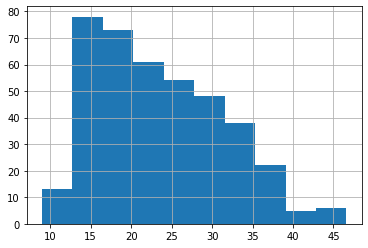

In [32]:
base['mpg'].hist()

In [0]:
pd.cut()